# 无监督机器学习  

主要通过调用python中sklearn库中的函数来实现聚类算法，主要包括：K-MEANS、近邻传播（AffinityPropagation）、均值偏移（MeanShift）、谱聚类（SpectralCluster）、层次聚类（AgglomerativeClustering）、密度噪声（DBSCAN）、平衡迭代层次聚类（Birch）、高斯混合（GMM）、双向聚类（SpectralBiclustering）。



## 1、生成数据集  

在学习测试阶段，可以通过sklearn中的make_blobs函数来生成随机数据集，方便进行相关功能的演练。  

make_blobs的用法  
data, label = make_blobs(n_features, n_samples, centers, random_state, cluster_std)  

n_features 表示每一个样本有多少特征值  
n_samples 表示样本的个数  
centers 聚类中心点的个数，可以理解为label的种类数  
random_state 随机种子，可以固定生成的数据  
cluster_std 设置每个类别的方差  


<IPython.core.display.Javascript object>


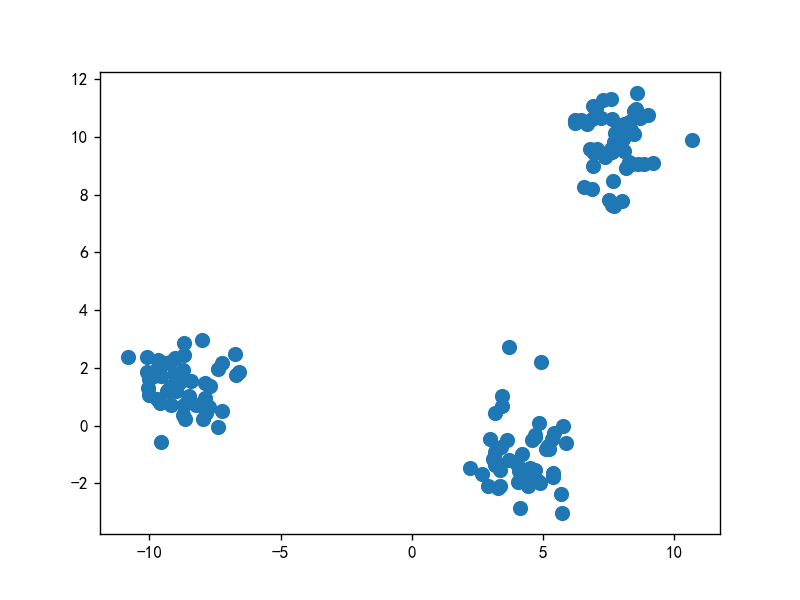

In [1]:
%matplotlib notebook
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 生成150*2的数据集
xn,labels_true = make_blobs(n_samples=150,centers=3)
plt.scatter(xn[:,0],xn[:,1],s=60)
plt.show()

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [3]:
plt.rc('font',family='SimHei'，size=10)

SyntaxError: invalid character in identifier (<ipython-input-3-9fc802f505ed>, line 1)

<IPython.core.display.Javascript object>


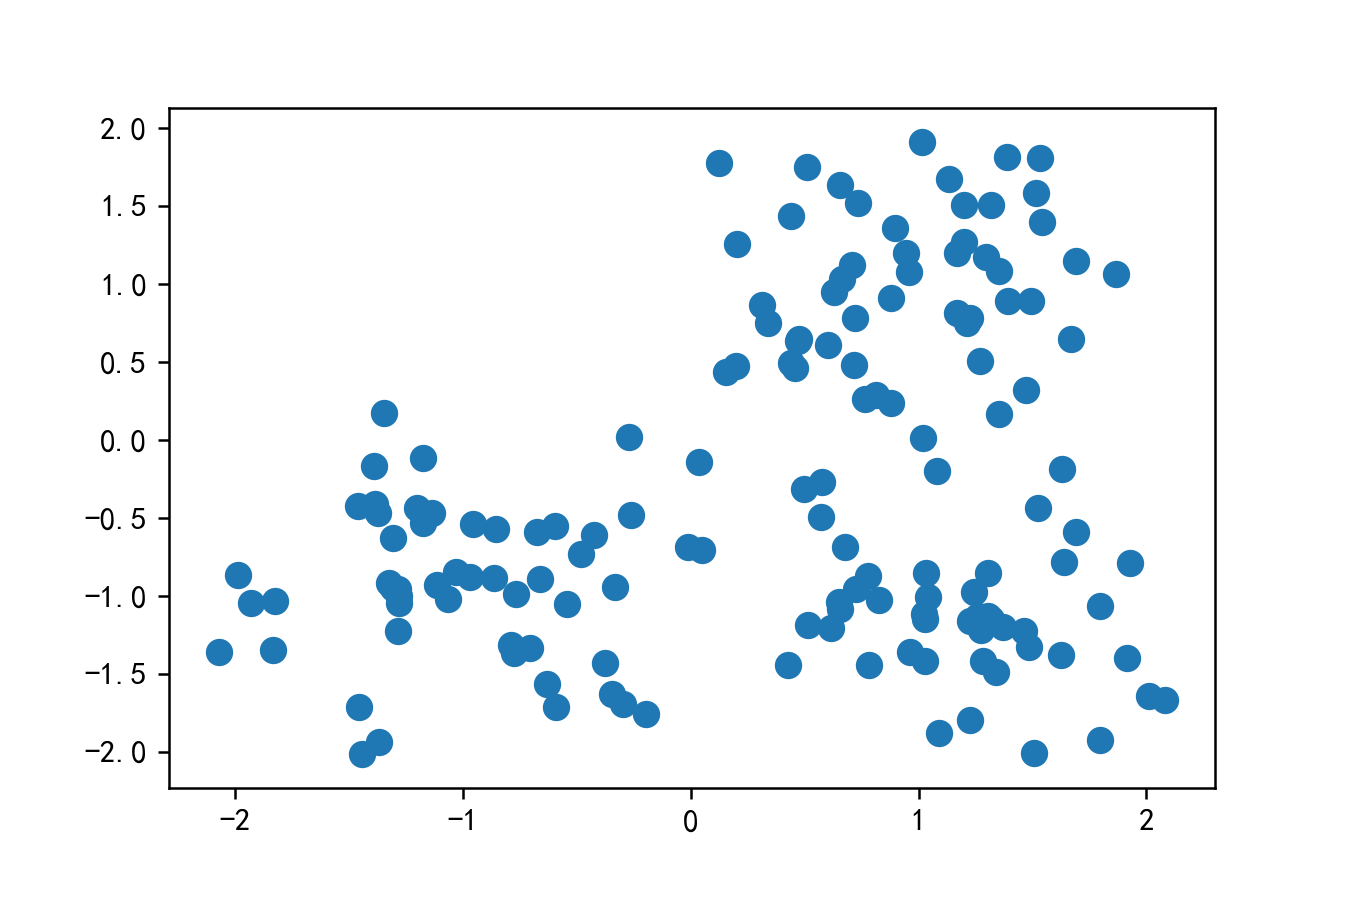

In [75]:
# 生成150*2的数据集
%matplotlib notebook
centers=[[1,1],[-1,-1],[1,-1]] # 设置类中心
xn,labels_true = make_blobs(n_samples=150,centers=centers,cluster_std=0.5) #根据类中心发生随机数
plt.scatter(xn[:,0],xn[:,1],s=60)
plt.show()

聚类结果： [0 2 1 1 2 0 2 2 0 2 2 2 1 0 0 0 1 2 0 1 0 2 1 1 2 0 1 1 2 0 1 1 2 0 1 2 1
 2 1 2 1 2 1 1 0 2 2 2 0 1 0 1 0 2 2 0 1 1 1 2 2 0 0 0 0 2 0 0 1 1 2 2 2 2
 1 0 2 1 1 0 2 0 2 1 0 1 1 0 0 0 1 2 0 2 2 0 1 0 1 1 0 0 2 2 1 1 0 1 2 1 1
 2 0 1 0 1 2 1 0 2 1 0 2 0 1 0 2 2 0 1 2 2 0 2 0 2 0 2 0 1 2 1 0 1 0 1 1 2
 0 0]
聚类中心：
 [[ 4.21766012 -1.05384363]
 [-8.73316555  1.40586906]
 [ 7.75934781  9.78574377]]


<IPython.core.display.Javascript object>


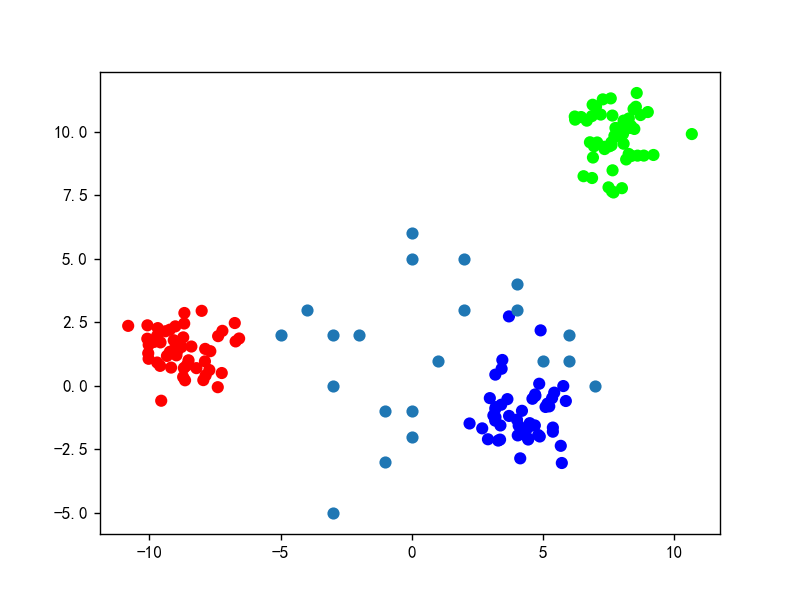

In [3]:
# 训练模型，设定把所有样本划分为3类
%matplotlib notebook
from sklearn.cluster import KMeans

k=3
kmeansPredicter = KMeans(n_clusters=k).fit(xn)

category = kmeansPredicter.labels_  # 提取分类结果标签
print('聚类结果：',category)
center = kmeansPredicter.cluster_centers_
print('聚类中心：\n',center)

plt.scatter(xn[:,0],xn[:,1],c=category,cmap='brg')
plt.show()

## 2.KMeans聚类算法：  
    选择样本空间中k个样本（点）作为初始中心，然后对剩余样本进行聚类，每个中心把距离自己最近的样本“吸引”过来，然后更新聚类中心的值，依次把每个样本归到距离最近的类中，重复上述的过程，直至得到某种条件下最好的聚类结果。  

步骤：  
1.按照定义好的规则选择k个样本作为每个类的初始中心；  
2.在每次迭代中，对任意一个样本，计算该样本到k个类中心的距离，将该样本归到距离最小的中心所在的类；  
3.利用均值或其它方法更新该类的中心值；  
4.重复上述过程，指导没有样本被重新分配到不同的类，或者没有聚类中心再发生变化，停止迭代。

In [4]:
# 聚类分析——KMeans聚类
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# 导入数据

df = pd.read_excel("聚类分析01.xls")
df.head()

,no,x1,x2
0,1,0,6
1,2,0,5
2,3,2,5
3,4,2,3
4,5,4,4


In [5]:
# 绘制图像

X = df.iloc[:,1:]

plt.scatter(df.x1,df.x2)
plt.show()

In [6]:
# 训练模型，设定把所有样本划分为2类
from sklearn.cluster import KMeans

k=2
kmeansPredicter = KMeans(n_clusters=k).fit(X)

category = kmeansPredicter.labels_  # 提取分类结果标签
print('聚类结果：',category)
df['kmeansLabel'] = category # 保存分类结果
center = kmeansPredicter.cluster_centers_
print('聚类中心：\n',center)


聚类结果： [1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0]
聚类中心：
 [[-2.2        -0.3       ]
 [ 3.36363636  2.81818182]]


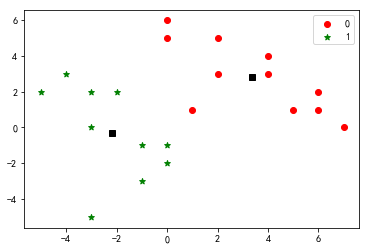

In [34]:
# 绘制图像
m = 'o*v+s'
color = 'rgby'
for i in range(k):
    indx = df['kmeansLabel']==i
    plt.scatter(df[indx]['x1'],df[indx]['x2'],marker=m[i],c=color[i],label=str(i))
    plt.plot(center[i,0],center[i,1],'sk')
plt.legend()
plt.show()

## 2. 系统聚类  
   系统聚类，又称为层次聚类等。该算法首先把所有样本看作各自一类，定义类间距离计算方式，选择距离最小的一对元素合并城一个新类，重复计算各类之间的距离并重复上面的步骤，直到将所有原始元素划分为制定数量的类。
   该方法的计算复杂度非常高，不适合大数据聚类问题。

In [36]:
from sklearn.cluster import AgglomerativeClustering

k=2
aggCluster = AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='ward').fit(X)
category = aggCluster.labels_  # 提取分类结果标签
print('聚类结果：',category)
df['aggCluster'] = category # 保存分类结果
df


聚类结果： [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]


,no,x1,x2,kmeansLabel,aggCluster
0,1,0,6,0,0
1,2,0,5,0,0
2,3,2,5,0,0
3,4,2,3,0,0
4,5,4,4,0,0
5,6,4,3,0,0
6,7,5,1,0,0
7,8,6,2,0,0
8,9,6,1,0,0
9,10,7,0,0,0


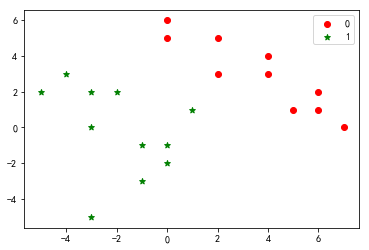

In [38]:
# 绘制图像
m = 'o*v+s'
color = 'rgby'
for i in range(k):
    indx = df['aggCluster']==i
    plt.scatter(df[indx]['x1'],df[indx]['x2'],marker=m[i],c=color[i],label=str(i))
plt.legend()
plt.show()

## 3. 谱聚类  

谱聚类是基于图论的知识所演化出的算法，在聚类中广泛使用。主要思想是将所有的数据看成空间中的点，这些点之间可以用边连接起来，距离较远的两点之间边的权重值较低，距离较近的两点间边的权重值较高，然后通过对所有数据点组成的图进行切图，让切图后不同子图间边的权重之和尽可能低，子图内边的权重之和尽可能高，从而达到聚类的目的。

聚类结果： [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]


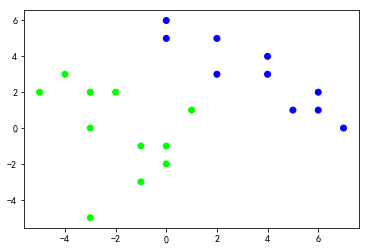

In [18]:
import sklearn.cluster as sc
model = sc.SpectralClustering(gamma=0.05,n_clusters=2).fit(X)
category = model.labels_  # 提取分类结果标签
print('聚类结果：',category)
df['spectCluster'] = category # 保存分类结果

plt.scatter(df['x1'],df['x2'],c=category,cmap='brg')
plt.show()


## 4. 密度聚类   DBSCAN（Density-Based Spetial Clustering of Application with Noise）    

该算法把类定义为密度相连对象的最大集合，通过在样本空间中不断搜索高密度的核心样本并扩展得到最大集合完成聚类。
该方法能够在带有噪声的样本空间中发现任意形状的距离并排除噪声。


'''  
    参数:  
        eps:两个样本之间的最大距离，即扫描半径  (最重要的两个参数）  
        min_samples ：作为核心点的话邻域(即以其为圆心，eps为半径的圆，含圆上的点)中的最小样本数(包括点本身)。(最重要的两个参数）  
        metric ：度量方式，默认为欧式距离，还有metric=‘precomputed’（稀疏半径邻域图）  
        algorithm：近邻算法求解方式，有四种：‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’  
        leaf_size：叶的大小，在使用BallTree or cKDTree近邻算法时候会需要这个参数  
        n_jobs ：使用CPU格式，-1代表全开  
    属性:  
        core_sample_indices_:核心样本指数。（此参数在代码中有详细的解释）  
        labels_:数据集中每个点的集合标签给,噪声点标签为-1。  
        components_ ：核心样本的副本  
'''  

聚类结果： [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1]


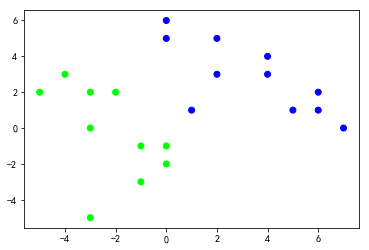

In [19]:
from sklearn.cluster import DBSCAN

model  = DBSCAN(eps=3,min_samples=5).fit(X)
category = model.labels_  # 提取分类结果标签
print('聚类结果：',category)
df['DBSCAN'] = category # 保存分类结果

plt.scatter(df['x1'],df['x2'],c=category,cmap='brg')
plt.show()

## 5. 平衡迭代层次聚类

聚类结果： [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]


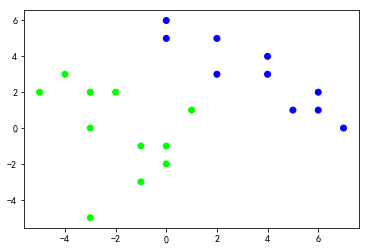

In [21]:
from sklearn.cluster import Birch

model  = Birch(n_clusters=2,threshold=0.2).fit(X)
category = model.labels_  # 提取分类结果标签
print('聚类结果：',category)
df['Birch'] = category # 保存分类结果

plt.scatter(df['x1'],df['x2'],c=category,cmap='brg')
plt.show()

## 6.高斯混合聚类

聚类结果： [1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]


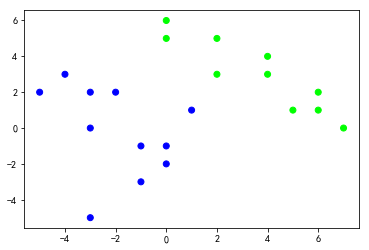

In [28]:
from sklearn.mixture import GaussianMixture

model  = GaussianMixture(n_components=2).fit(X)

category = model.predict(X)  # 提取分类结果标签
print('聚类结果：',category)
df['GM'] = category # 保存分类结果

plt.scatter(df['x1'],df['x2'],c=category,cmap='brg')
plt.show()

## 其它有用的信息

<IPython.core.display.Javascript object>


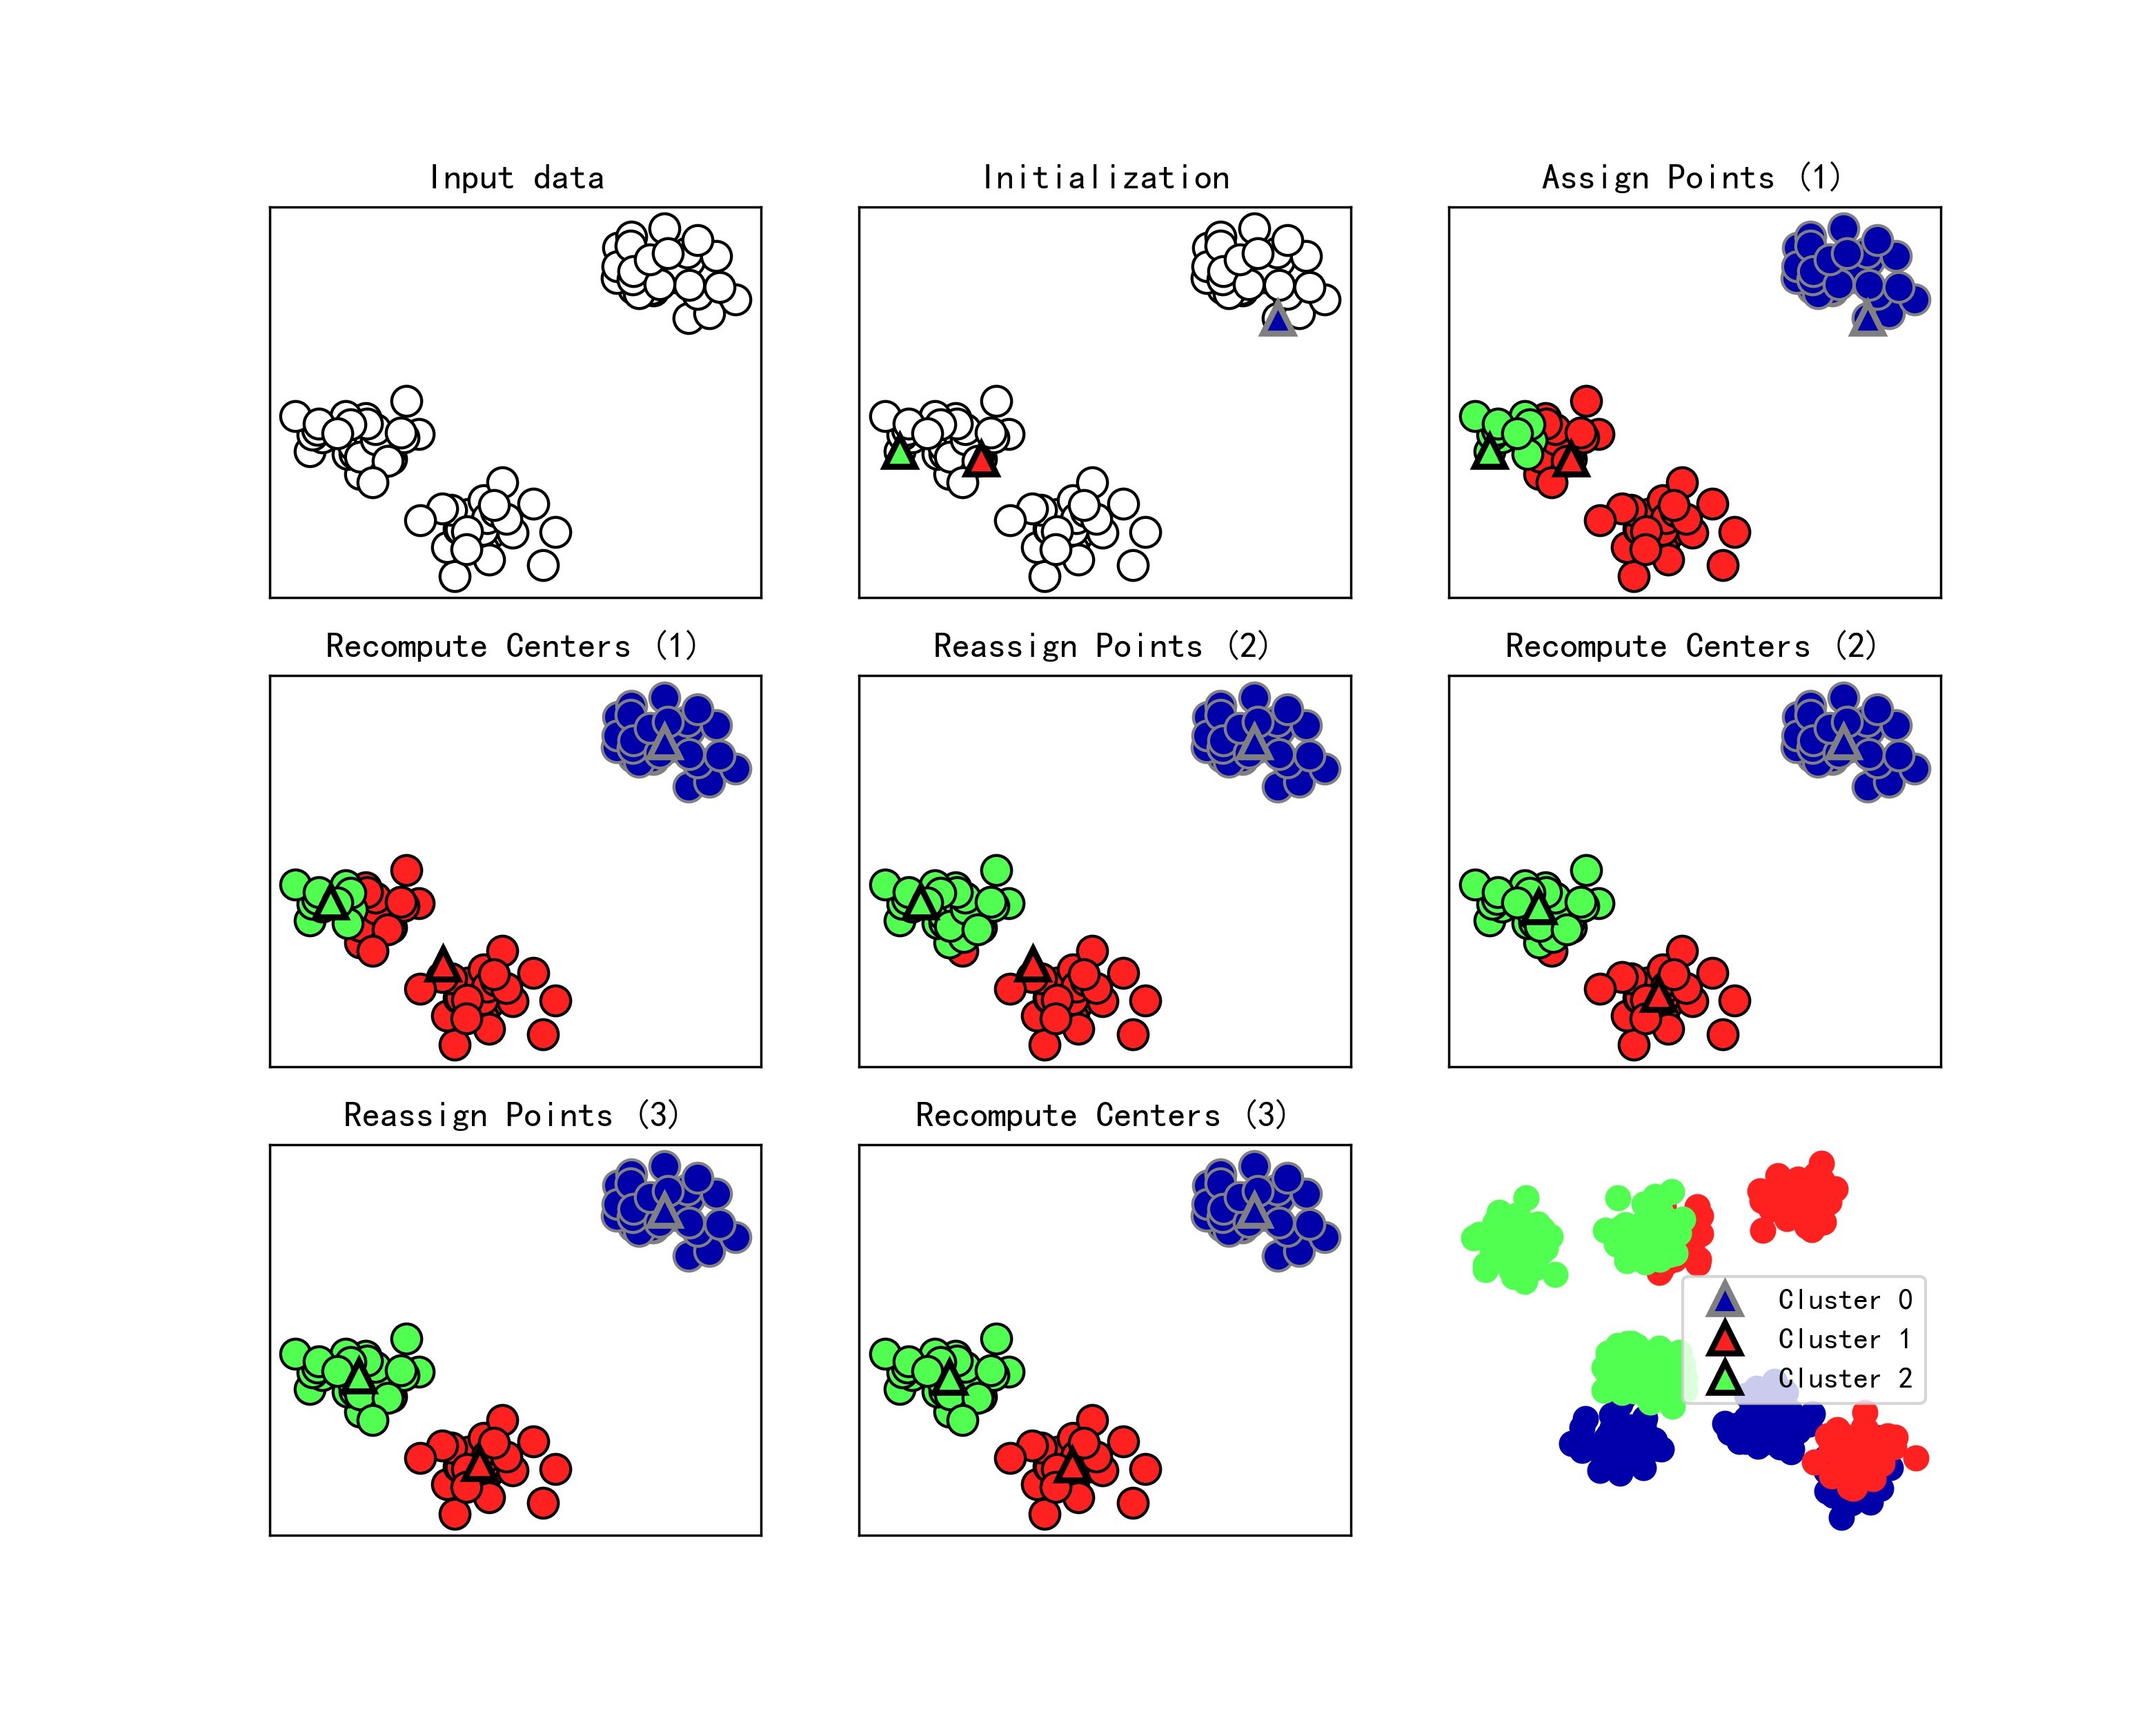

In [46]:
import mglearn
import matplotlib.pyplot as plt

mglearn.plots.plot_kmeans_algorithm()
    
plt.show()

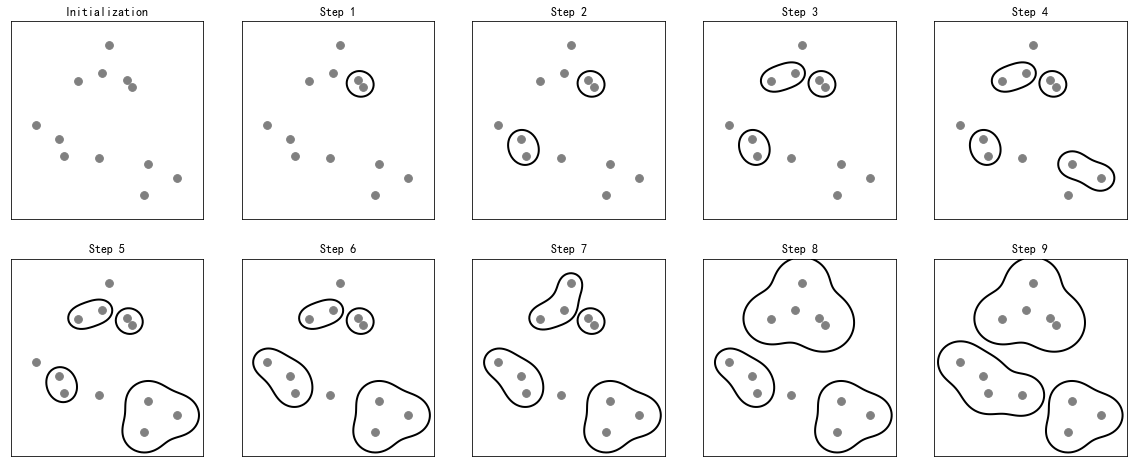

In [41]:
import mglearn
import matplotlib.pyplot as plt

mglearn.plots.plot_agglomerative_algorithm()

plt.show()

In [49]:
mglearn.plot_linear_regression??

<IPython.core.display.Javascript object>


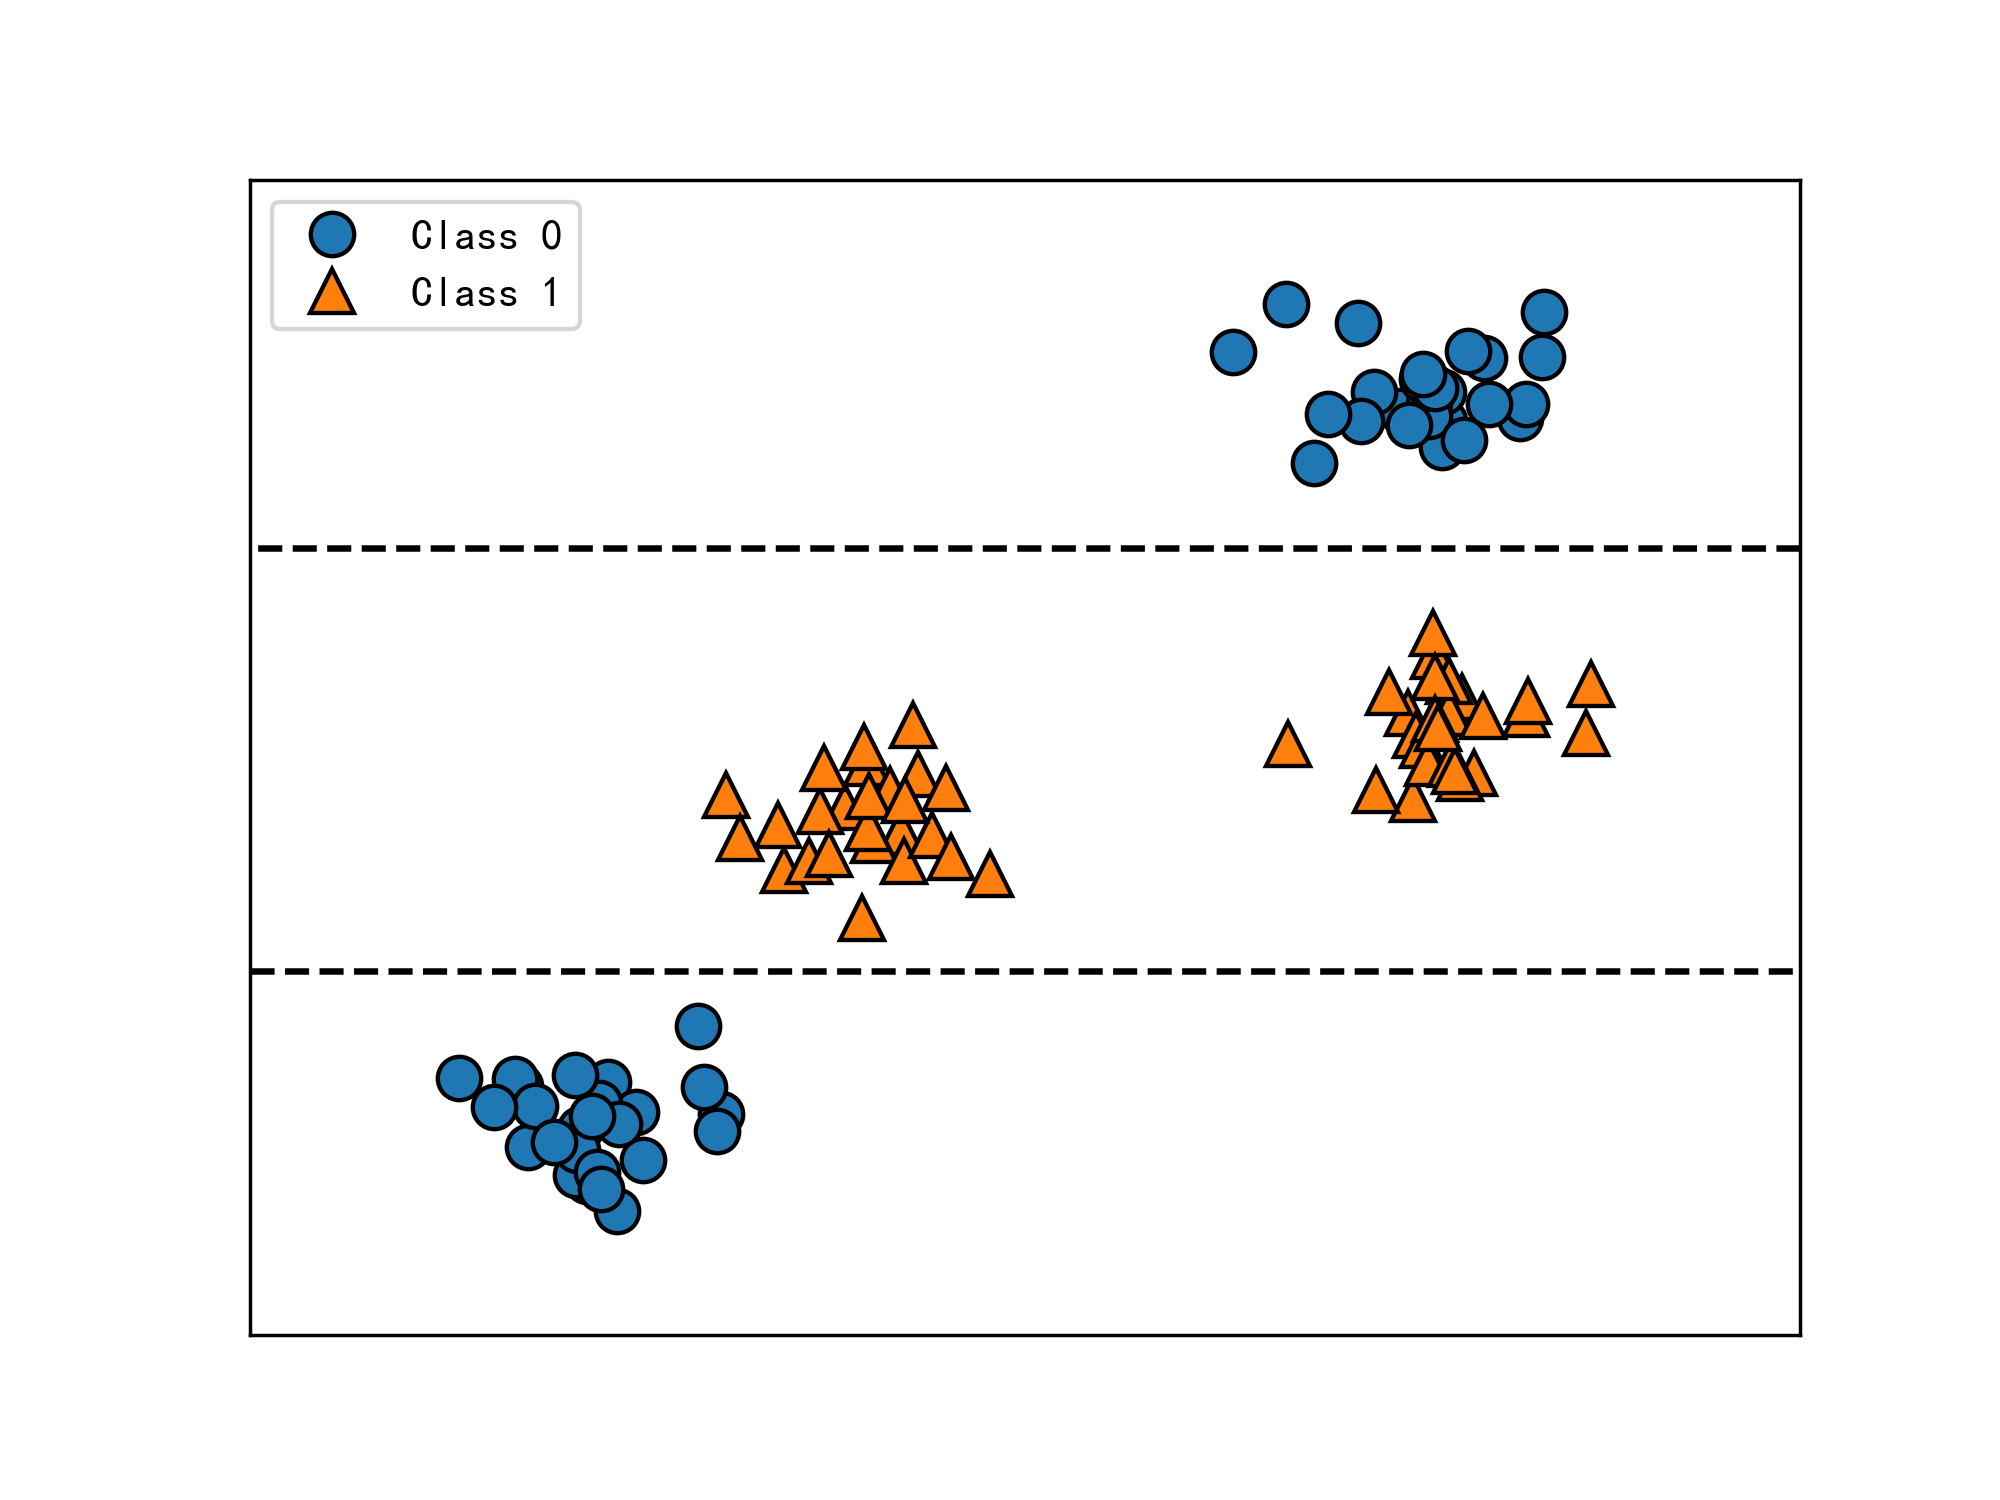

Feature importances: [0. 1.]


ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

In [29]:
import mglearn
from IPython.display import display

%matplotlib notebook


tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

<IPython.core.display.Javascript object>


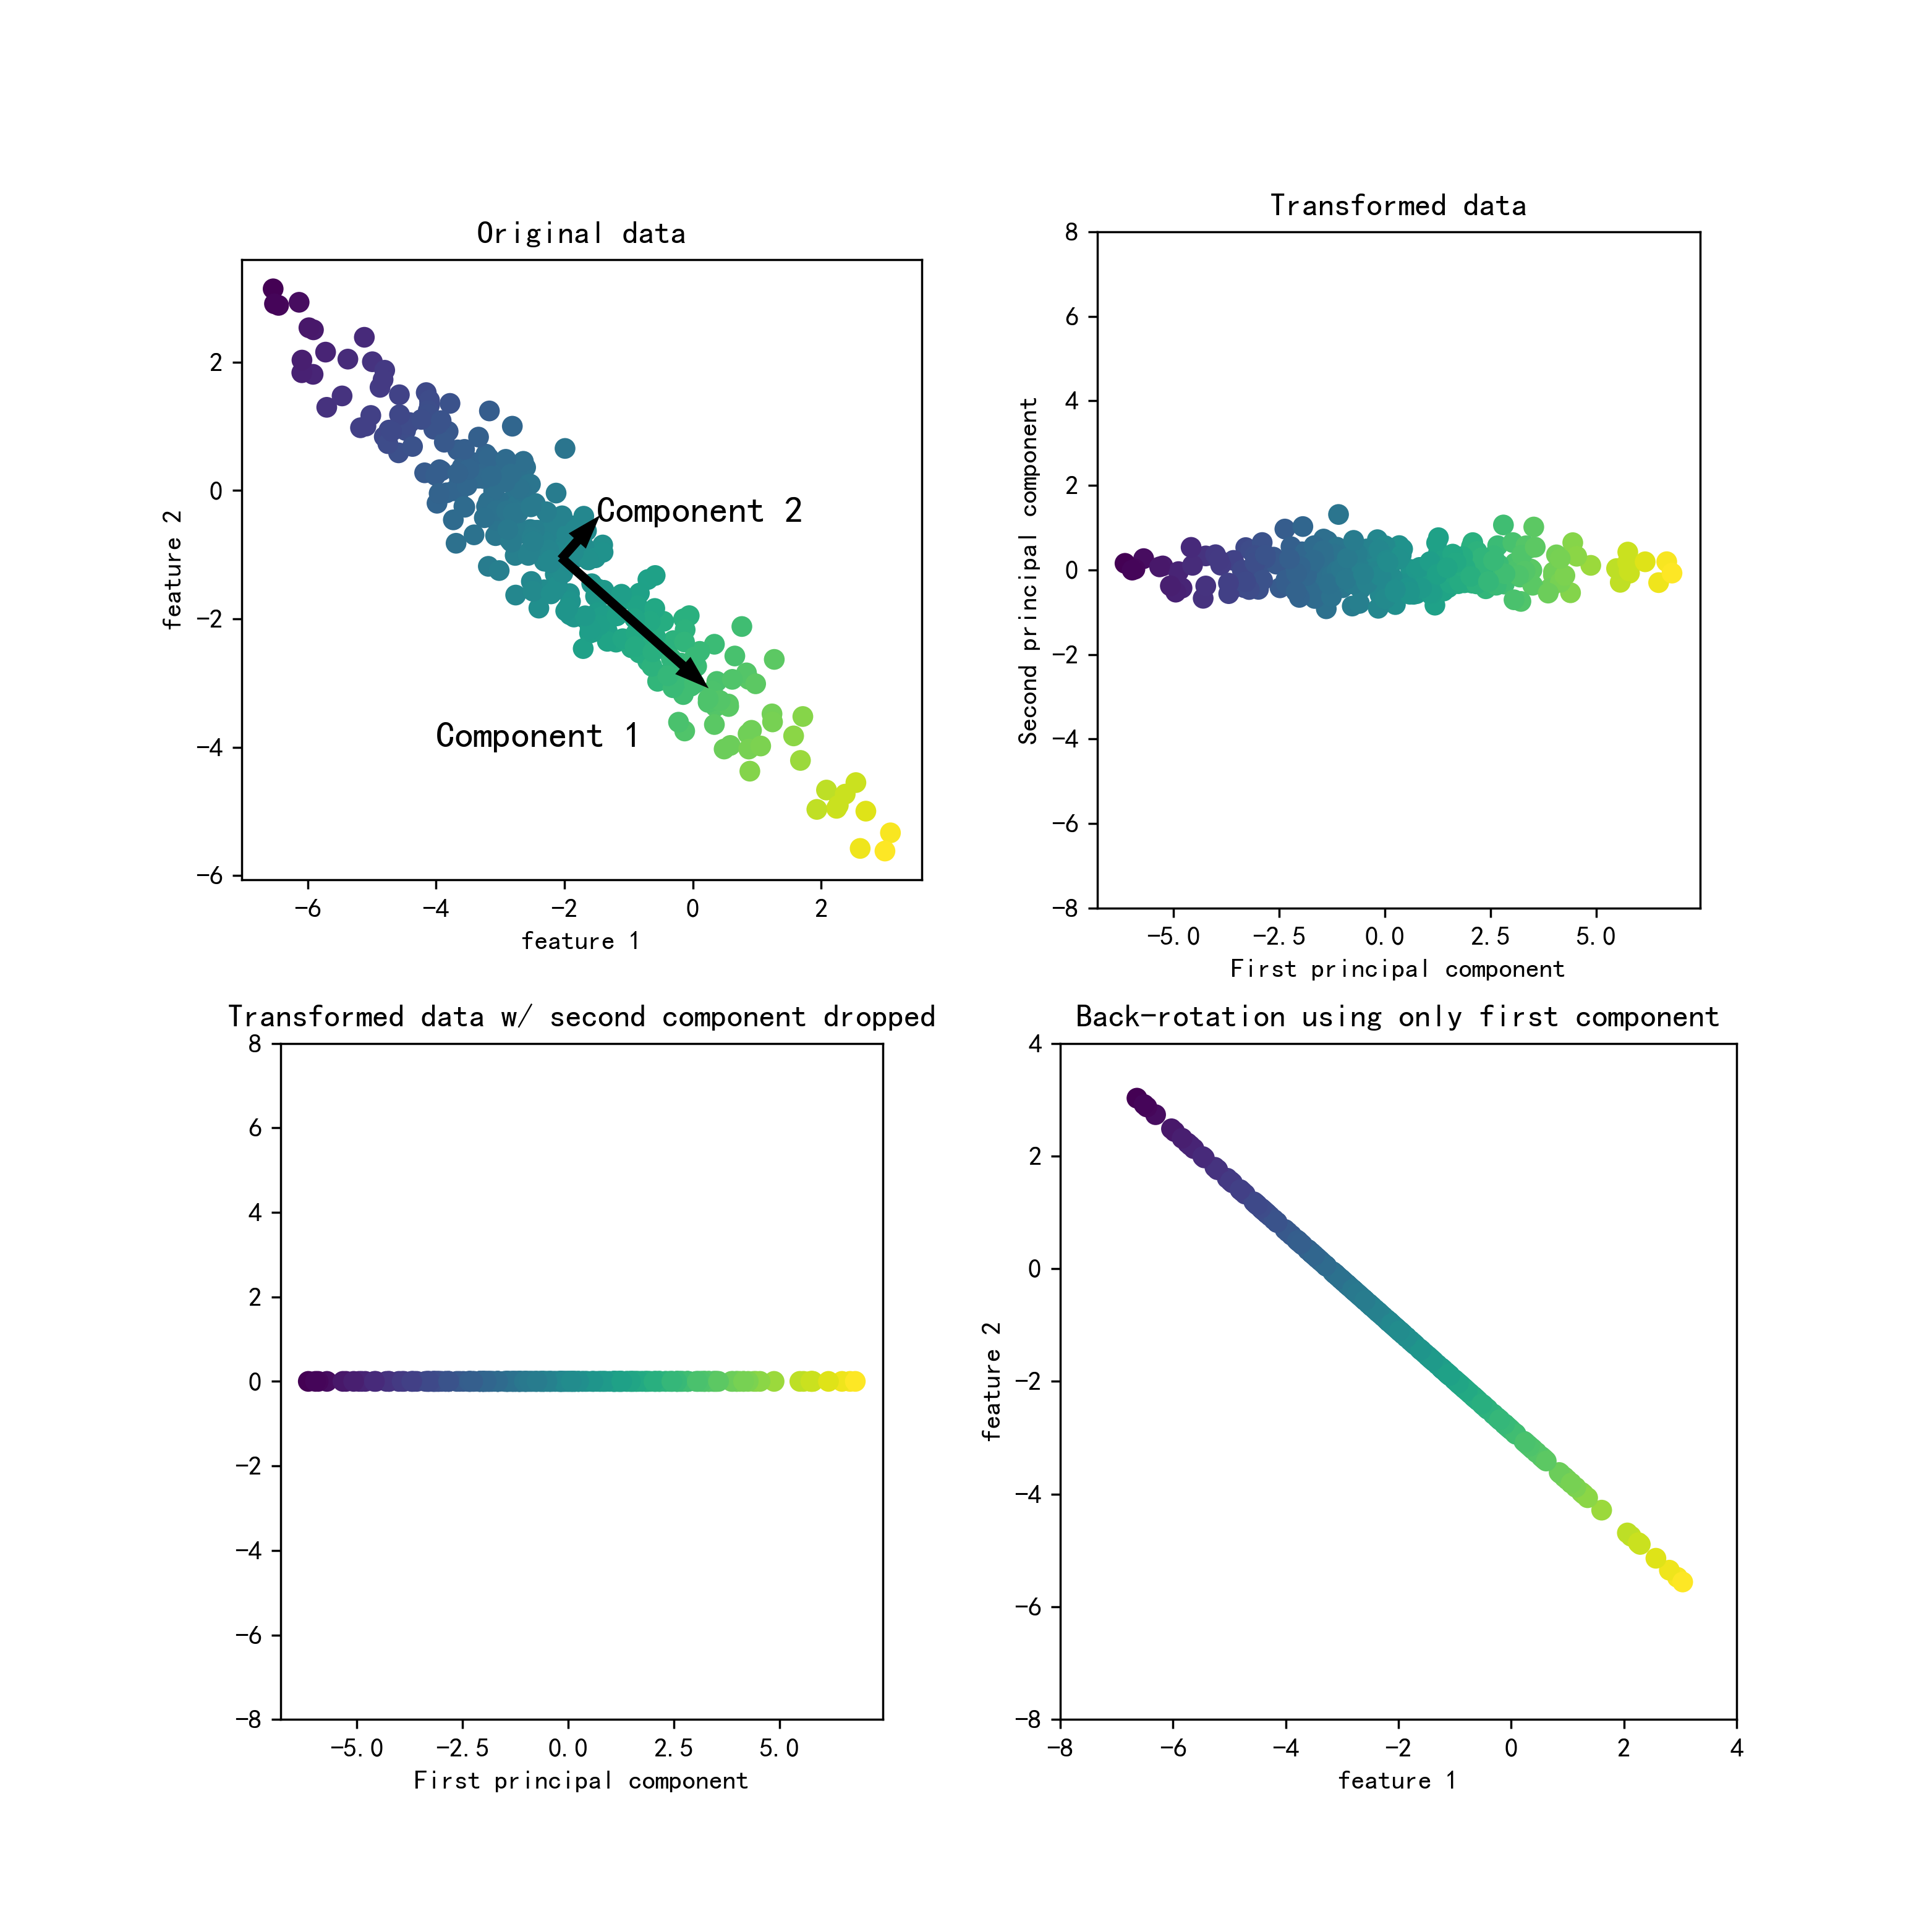

In [44]:
import mglearn
import matplotlib.pyplot as plt

mglearn.plots.plot_pca_illustration()

plt.show()